In [5]:
import numpy
import pandas as pd
import stats 
from datlib.plots import * 
from datlib.FRED import *
data_codes  = {"Consumer Price Index: Food and Beverages": "CPIEBEV",
              "Overall Consumer Price Index": "CPIEALL",
              "U.S. National Home Price Index": "CSUSHPINSA"}
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "M")

In [6]:
data_codes  = {"U.S. National Home Price Index": "CSUSHPINSA",
               "Average Weekly Earnings of Production and Nonsupervisory Employees, Total Private": "CES0500000030",
               "Trade Balance: Goods and Services, Balance of Payments Basis": "BOPGSTB",}
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, start = start, 
                   end = end, freq = "M")

In [7]:
data.dropna(how="all", axis = 0).dropna(how = "all", axis = 0)

,U.S. National Home Price Index,"Average Weekly Earnings of Production and Nonsupervisory Employees, Total Private","Trade Balance: Goods and Services, Balance of Payments Basis"
DATE,,,
2002-01-31,116.436,497.41,-29678.000000
2002-02-28,116.917,499.56,-32501.000000
2002-03-31,117.930,502.40,-31161.000000
2002-04-30,119.209,503.08,-33965.000000
2002-05-31,120.788,504.43,-34026.000000
...,...,...,...
2021-04-30,249.870,872.94,-66659.000000
2021-05-31,255.526,878.08,-68538.000000
2021-06-30,261.062,877.05,-73230.000000


In [8]:
nan_value = float("NaN")
data.replace("", nan_value, inplace=True)
data.dropna(subset = ['U.S. National Home Price Index', 
                      'Average Weekly Earnings of Production and Nonsupervisory Employees, Total Private', 
                      'Trade Balance: Goods and Services, Balance of Payments Basis'], inplace=True)

In [9]:
data

,U.S. National Home Price Index,"Average Weekly Earnings of Production and Nonsupervisory Employees, Total Private","Trade Balance: Goods and Services, Balance of Payments Basis"
DATE,,,
2002-01-31,116.436,497.41,-29678.000000
2002-02-28,116.917,499.56,-32501.000000
2002-03-31,117.930,502.40,-31161.000000
2002-04-30,119.209,503.08,-33965.000000
2002-05-31,120.788,504.43,-34026.000000
...,...,...,...
2021-04-30,249.870,872.94,-66659.000000
2021-05-31,255.526,878.08,-68538.000000
2021-06-30,261.062,877.05,-73230.000000


In [10]:
data = data.rename(columns = {'U.S. National Home Price Index': 'Home Price Index',
                              'Average Weekly Earnings of Production and Nonsupervisory Employees, Total Private': 'Average Weekly Earning',
                             'Trade Balance: Goods and Services, Balance of Payments Basis': 'Trade Balance'}, inplace = False)
data

,Home Price Index,Average Weekly Earning,Trade Balance
DATE,,,
2002-01-31,116.436,497.41,-29678.000000
2002-02-28,116.917,499.56,-32501.000000
2002-03-31,117.930,502.40,-31161.000000
2002-04-30,119.209,503.08,-33965.000000
2002-05-31,120.788,504.43,-34026.000000
...,...,...,...
2021-04-30,249.870,872.94,-66659.000000
2021-05-31,255.526,878.08,-68538.000000
2021-06-30,261.062,877.05,-73230.000000


In [11]:
stats_dict = {}
cov_dict = {}
corr_dict = {}

In [12]:
for key1, vec1 in data.items():
    stats_dict[key1] = {}
    stats_dict[key1]["variance"] = stats.variance(vec1)
    cov_dict[key1] = {}
    corr_dict[key1] = {}
    for key2, vec2 in data.items():
        cov_dict[key1][key2] = stats.covariance(vec1, vec2, sample = True)
        corr_dict[key1][key2] = stats.correlation(vec1, vec2)

In [13]:
variance_df = pd.DataFrame(stats_dict).sort_index(axis = 0).sort_index(axis = 1)
cov_df = pd.DataFrame(cov_dict).sort_index(axis = 0).sort_index(axis = 1)
corr_df = pd.DataFrame(corr_dict).sort_index(axis = 0).sort_index(axis = 1)

In [14]:
variance_df

,Average Weekly Earning,Home Price Index,Trade Balance
variance,10130.296378,932.107207,1.081323e+08


In [15]:
cov_df

,Average Weekly Earning,Home Price Index,Trade Balance
Average Weekly Earning,10173.404022,2394.521117,-1.132142e+05
Home Price Index,2394.521117,936.073620,-1.800926e+05
Trade Balance,-113214.221739,-180092.577205,1.085924e+08


In [16]:
corr_df

,Average Weekly Earning,Home Price Index,Trade Balance
Average Weekly Earning,1.000000,0.775944,-0.107713
Home Price Index,0.775944,1.000000,-0.564860
Trade Balance,-0.107713,-0.564860,1.000000


In [17]:
variance_df.to_csv("Datastats.csv")
cov_df.to_csv("DataCovMatrix.csv")
corr_df.to_csv("DataCorrMatrix.csv")
data.to_csv("HW5Data.csv")

Home Price Index Average Weekly Earning Trade Balance


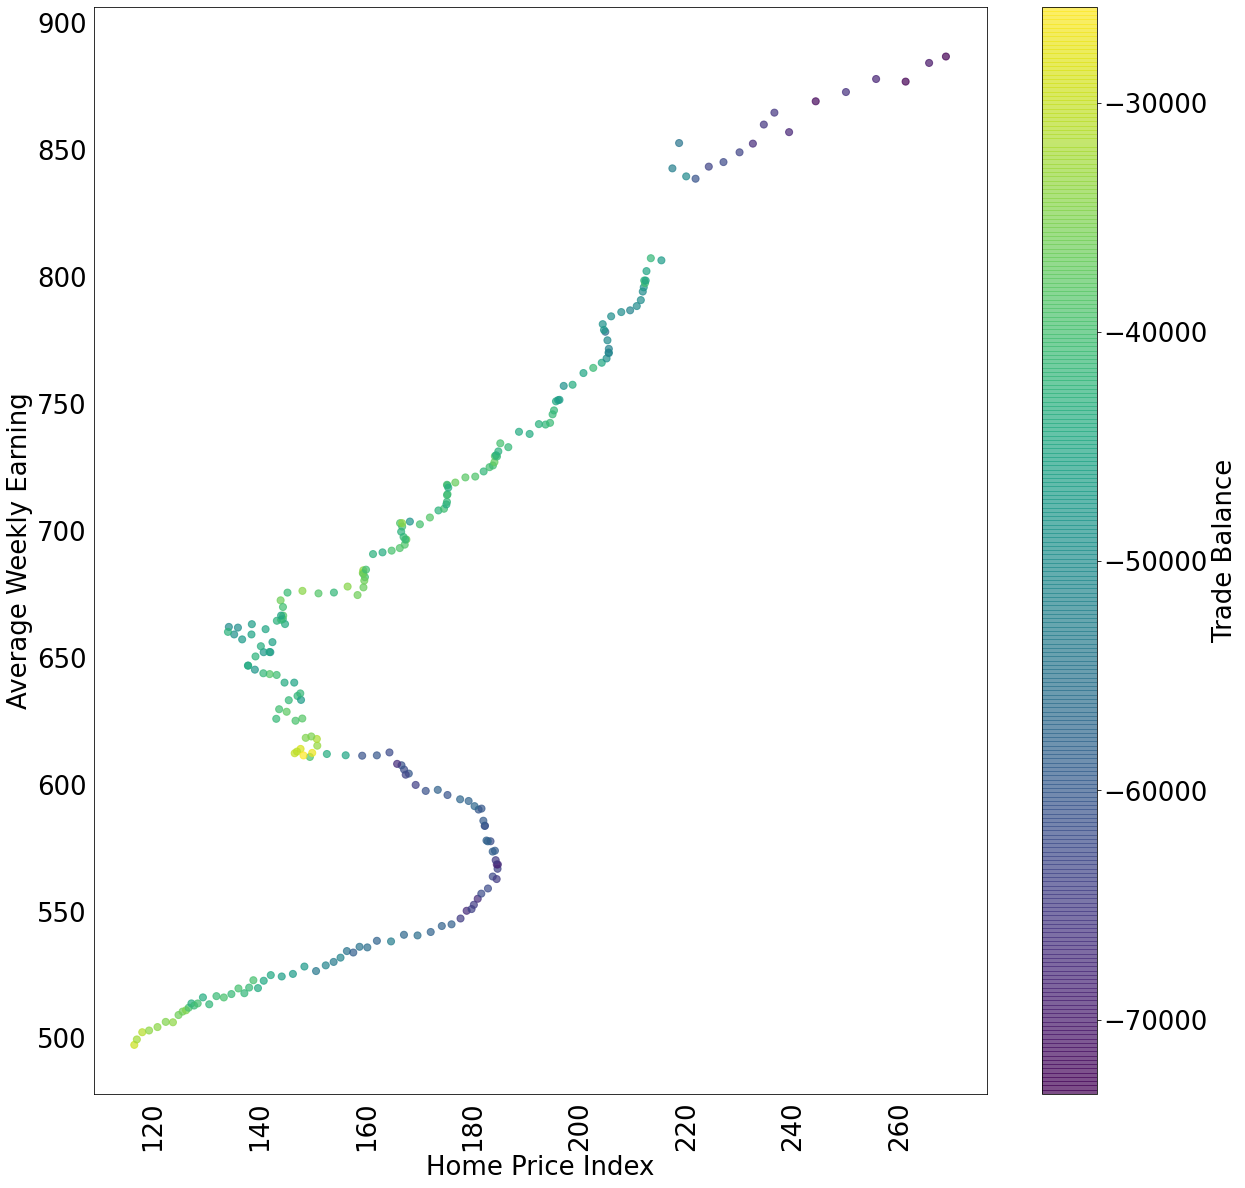

Home Price Index Trade Balance Average Weekly Earning


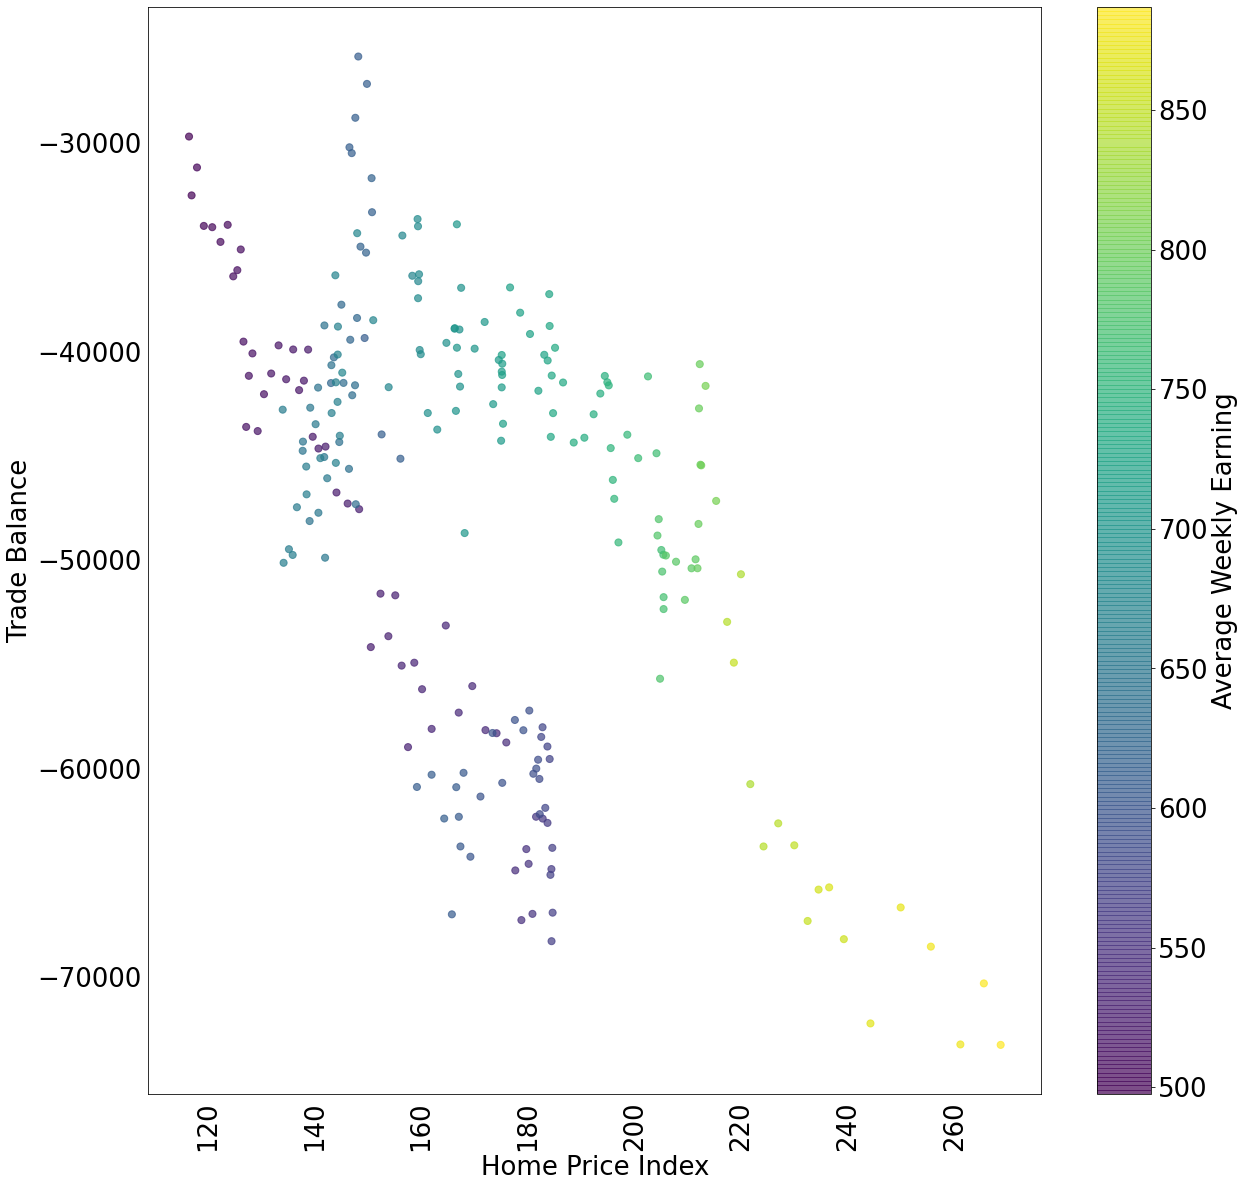

Average Weekly Earning Home Price Index Trade Balance


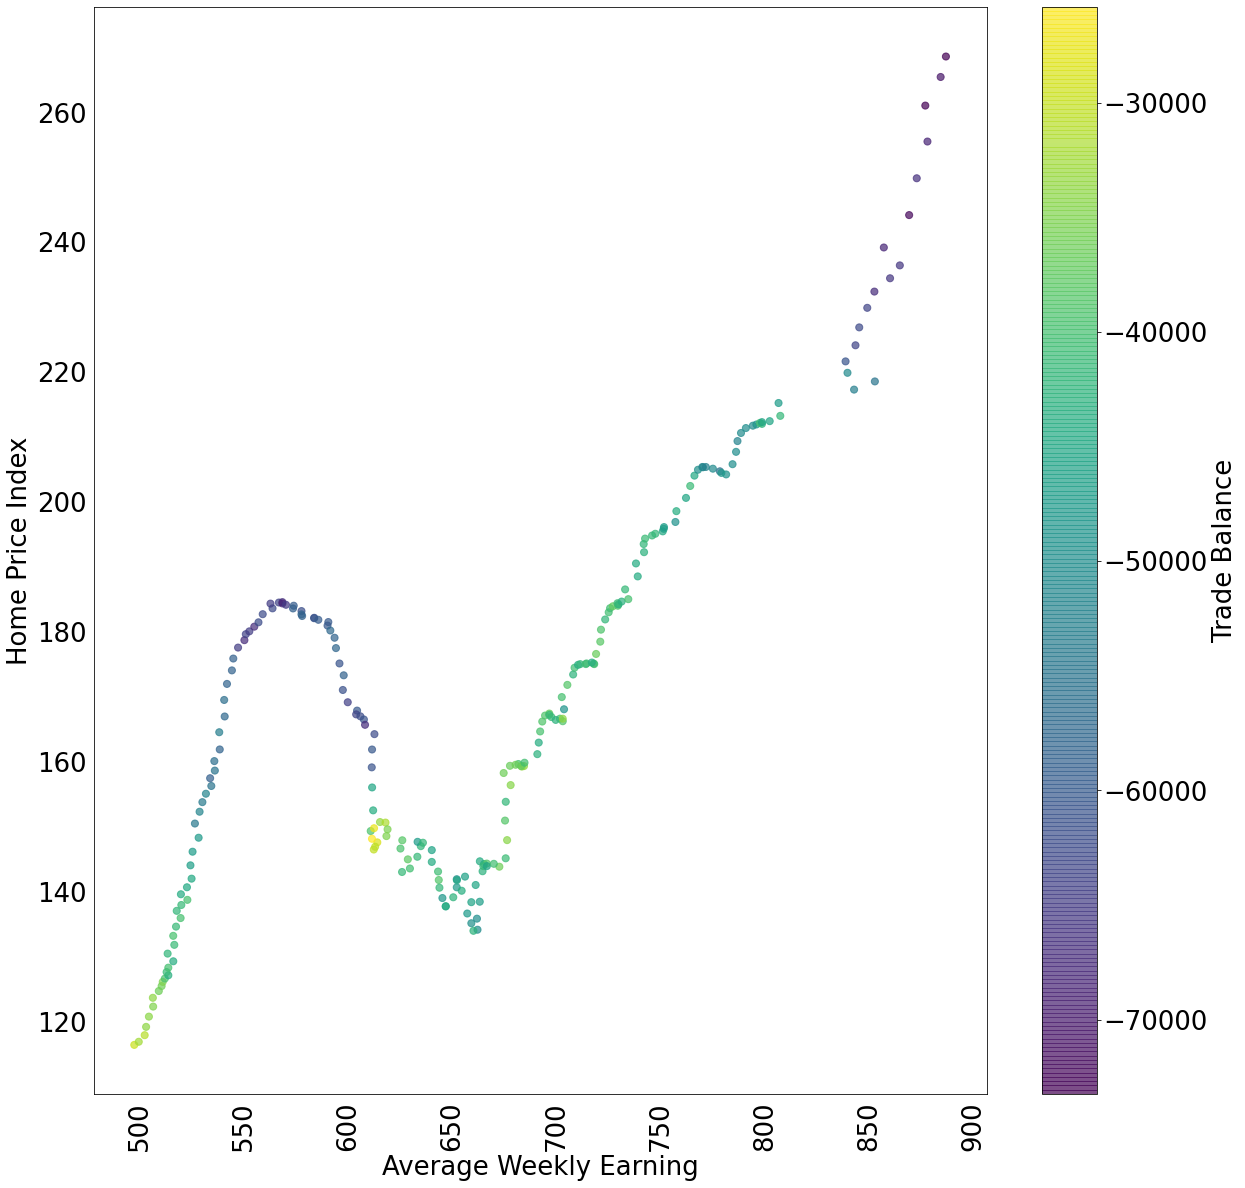

Average Weekly Earning Trade Balance Home Price Index


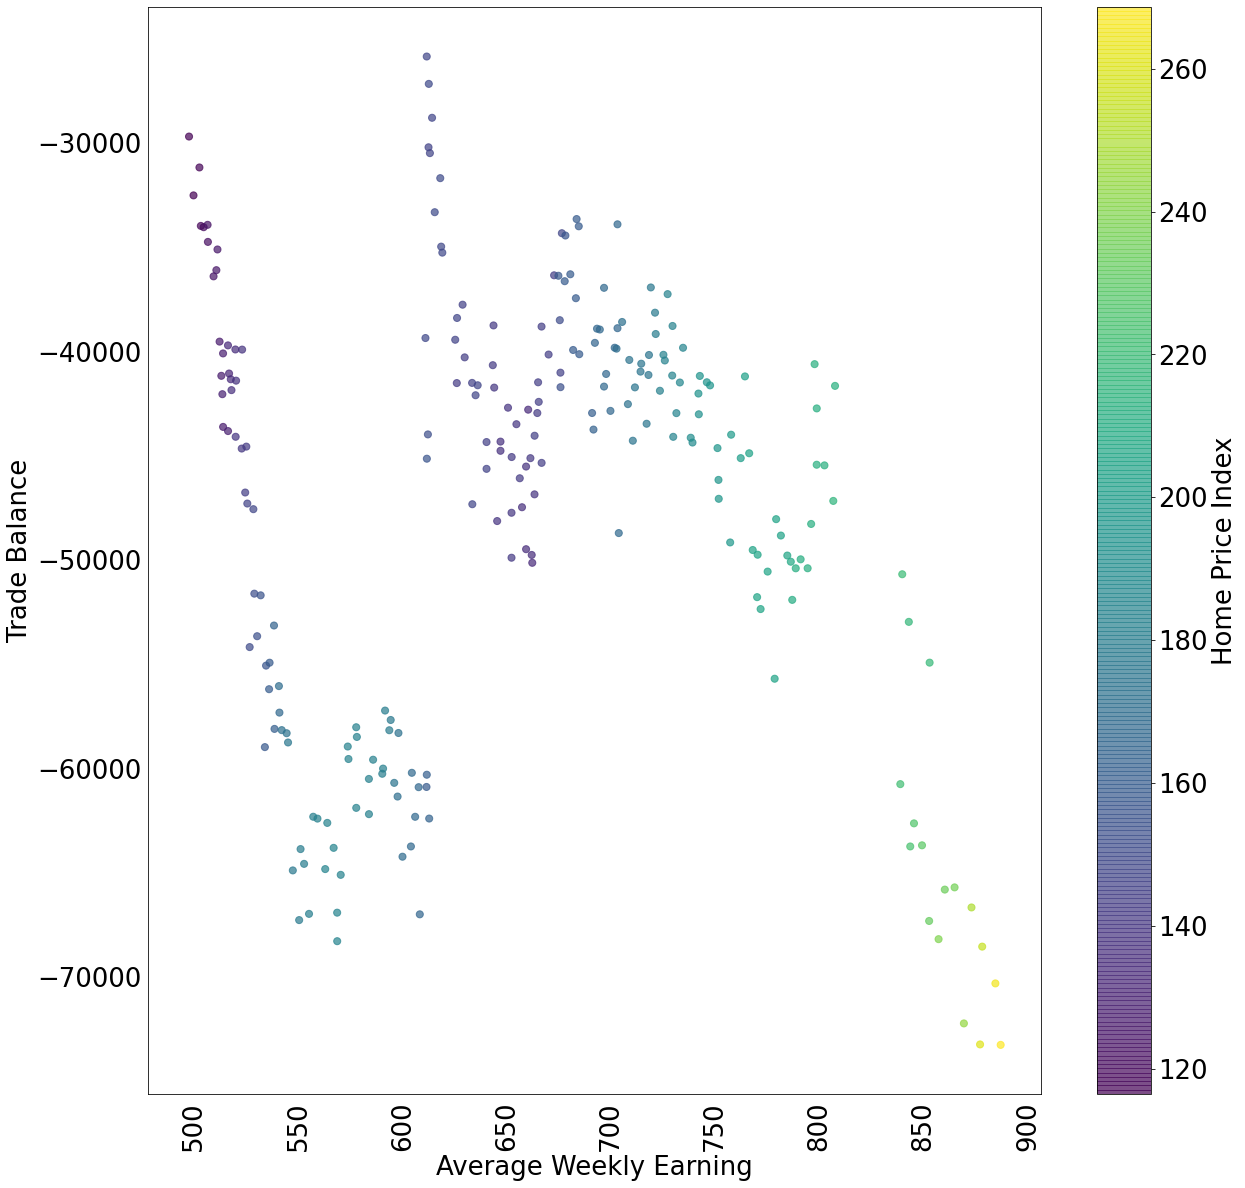

Trade Balance Home Price Index Average Weekly Earning


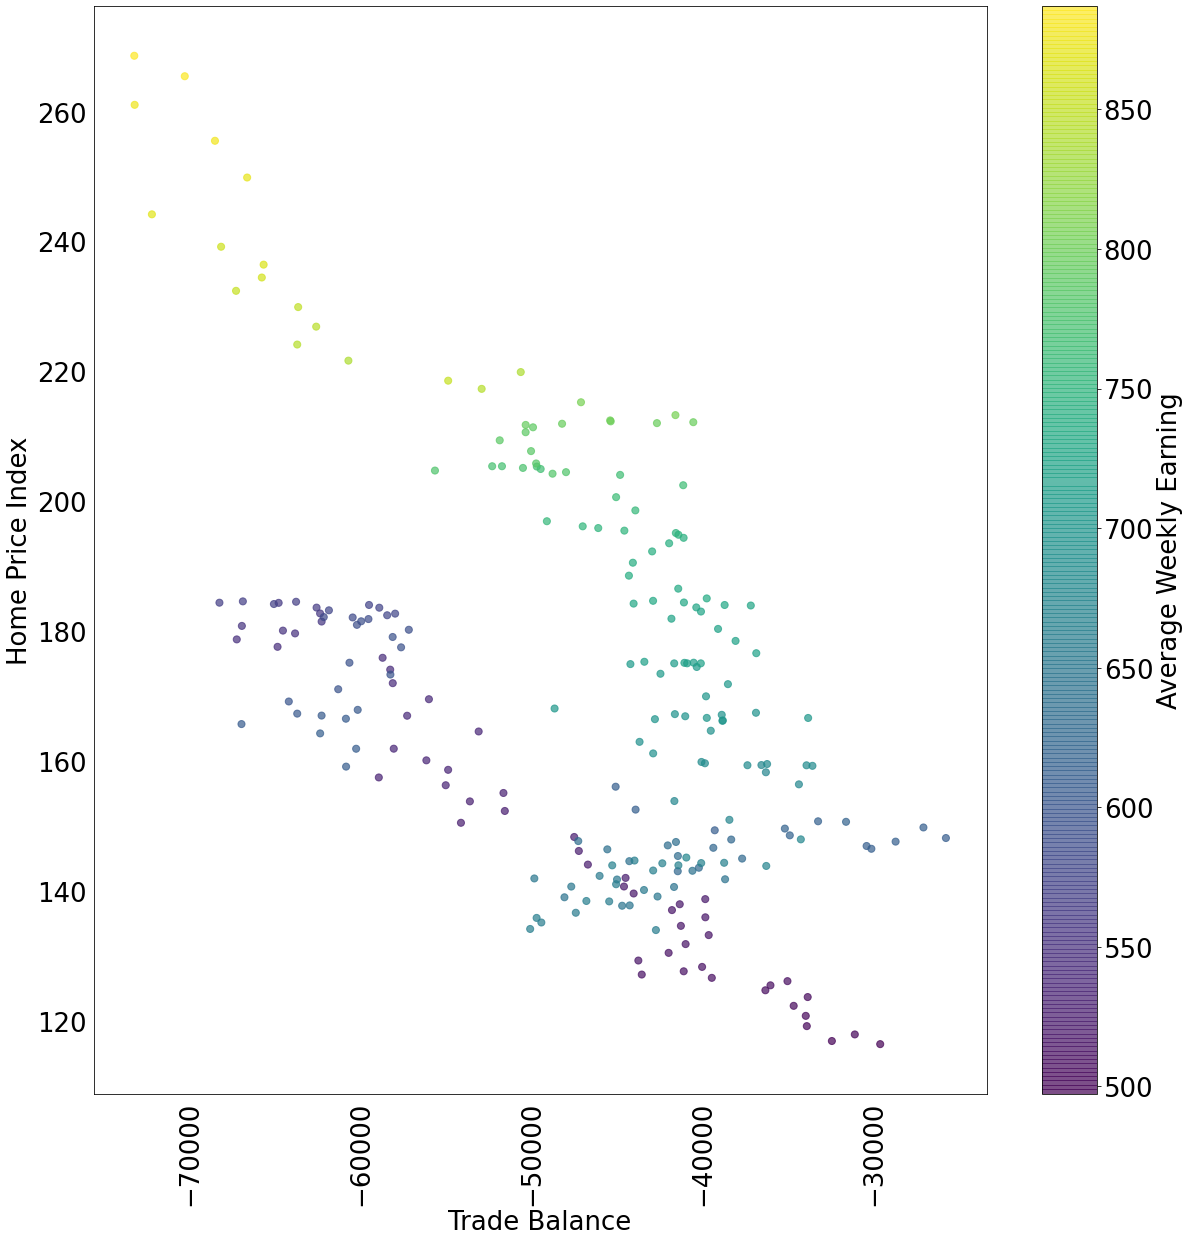

Trade Balance Average Weekly Earning Home Price Index


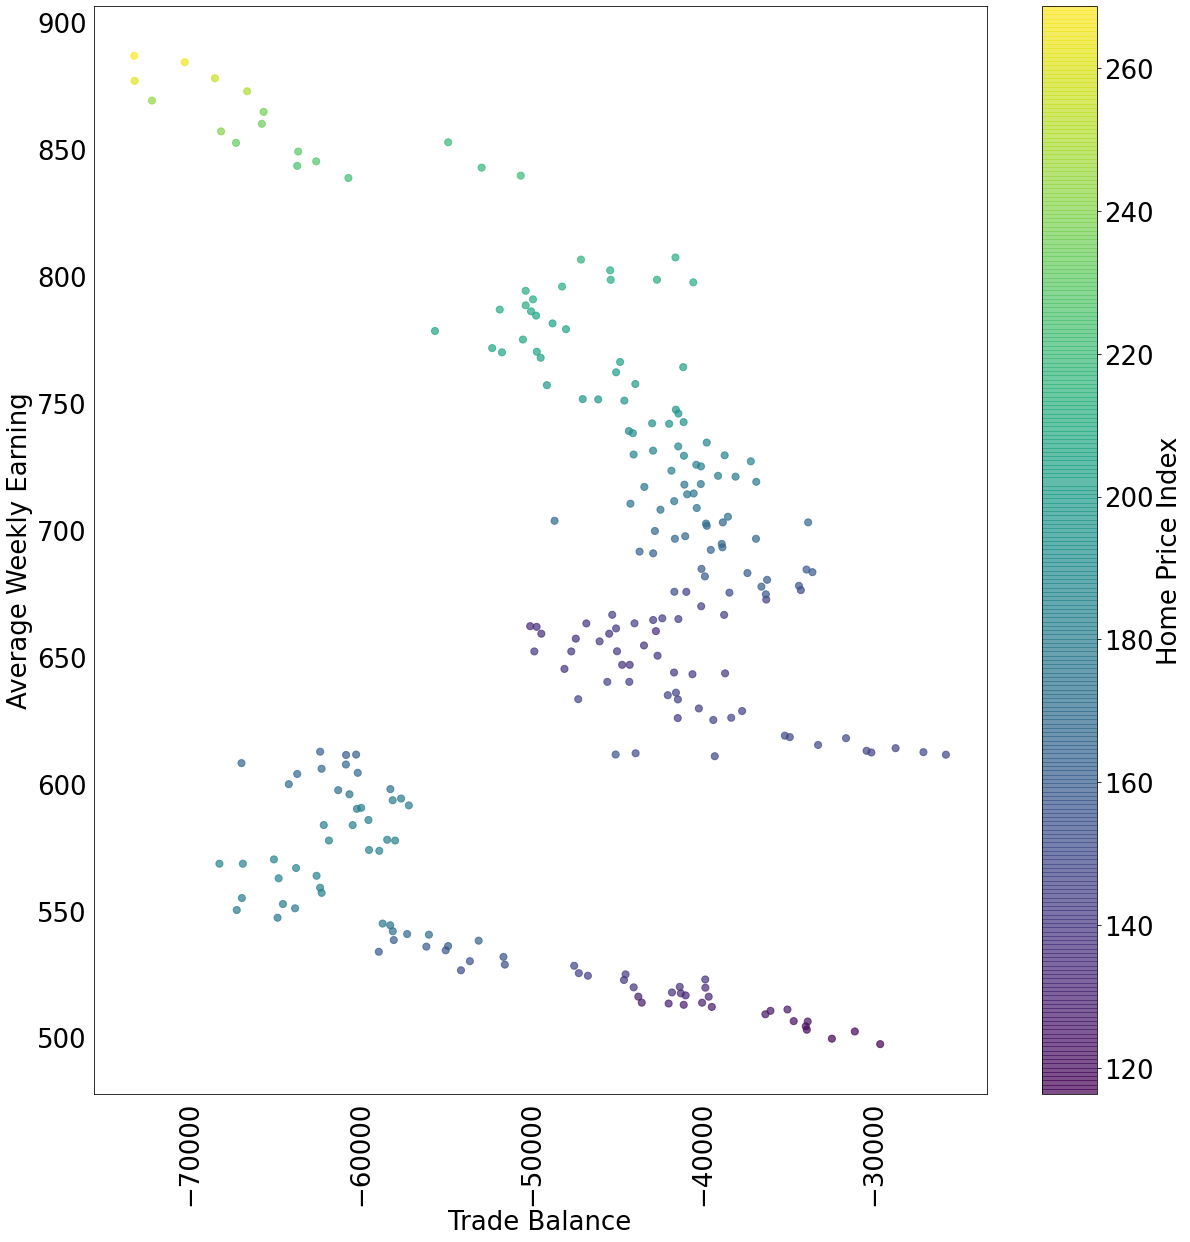

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def color_dim_scatter(data, pp):  
    for key1 in data:  
        for key2 in data:  
            for key3 in data:  
                if key1 != key2 and key1 != key3 and key2 != key3:  
                    print(key1,key2,key3)
                    fig, ax = plt.subplots(figsize = (20, 20))  
                    data.plot.scatter(x = key1, y = key2, c = key3, s = 50,  
                                      alpha = .7, colormap = "viridis",  
                                      ax = ax)  
                    plt.xticks(rotation = 90)  
                    plt.setp(ax.get_xticklines(), visible = False)  
                    plt.setp(ax.get_yticklines(), visible = False)  
                    plt.show()  
                    pp.savefig(fig, bbox_inches = "tight")  
                    plt.close()  
pp = PdfPages("Homework 5 Plots.pdf")
plt.rcParams.update({"font.size" : 26})
color_dim_scatter(data, pp)

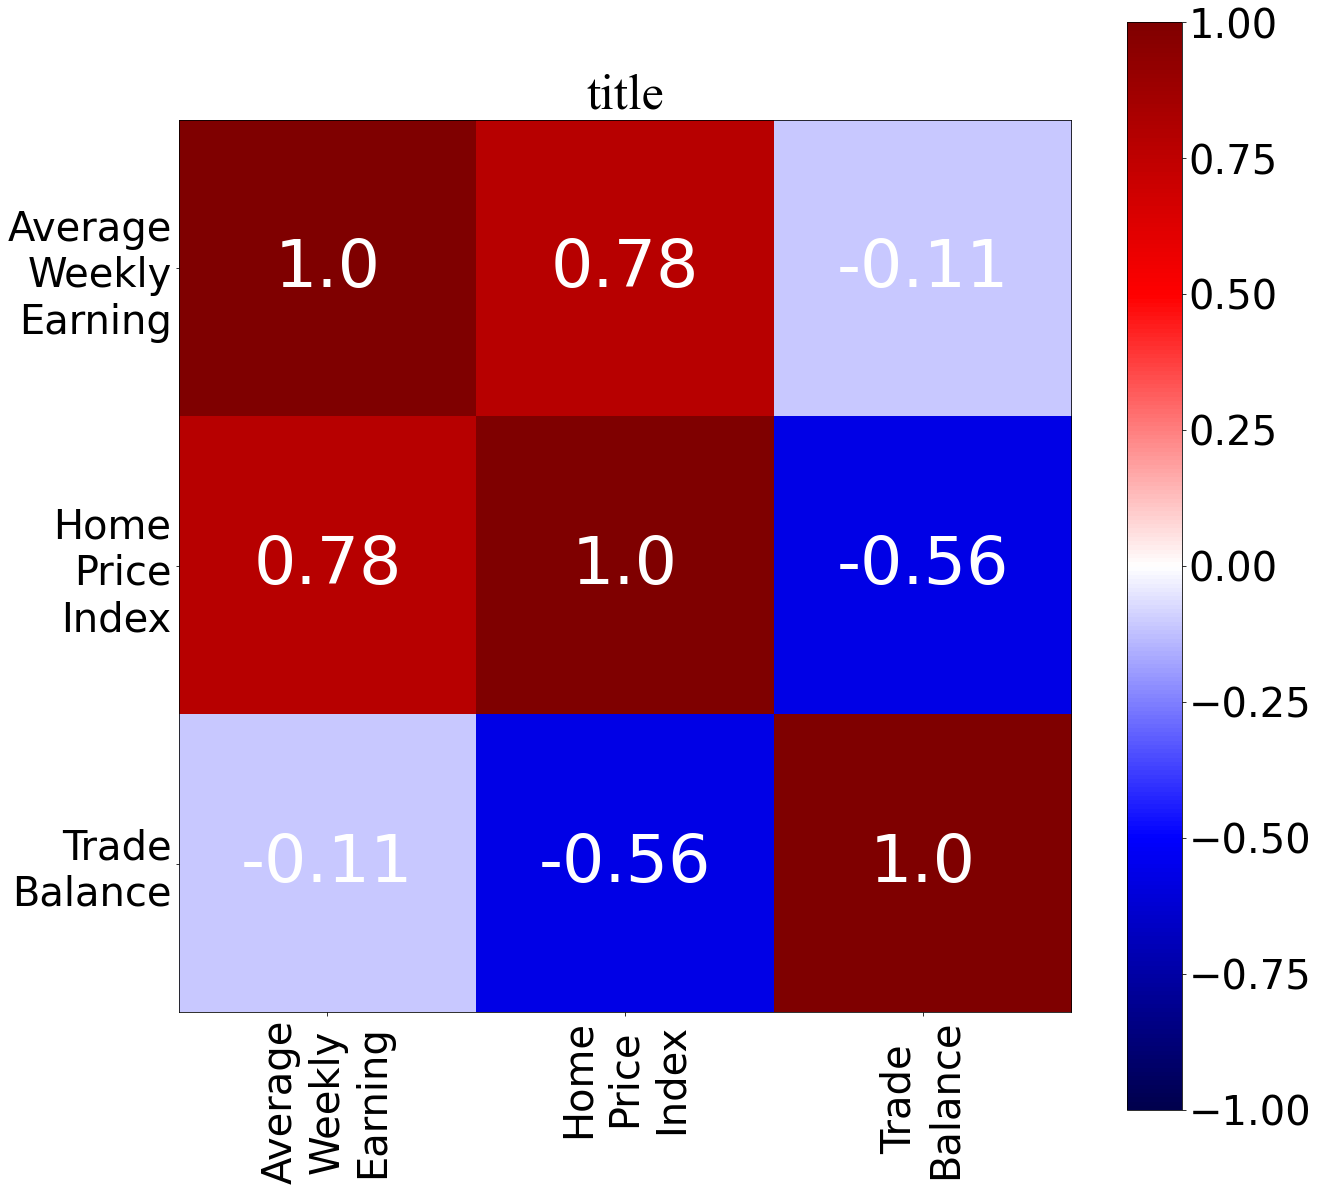

In [19]:
import numpy as np
def corr_matrix_heatmap(data, pp=None, title = "Correlation"):  
    fig, ax = plt.subplots(figsize=(20,20))  
    im = ax.imshow(data, 
                   norm = plt.cm.colors.Normalize(-1,1), 
                   cmap = "seismic")  
    labels = data.keys()  
    num_vars = len(labels)  
    tick_labels = [lab.replace(" ", "\n") for lab in labels]  
    tick_font_size = 120 / num_vars  
    val_font_size = 200 / num_vars  
    plt.rcParams.update({'font.size': tick_font_size}) 
    x_ticks = np.arange(num_vars)  
    plt.xticks(x_ticks, 
               tick_labels, 
               fontsize = tick_font_size, 
               rotation = 90)  
    y_ticks = np.arange(len(labels))  
    plt.yticks(y_ticks, 
               tick_labels, 
               fontsize = tick_font_size)  
    for i in range(len(labels)):  
        for j in range(len(labels)):  
            text = ax.text(i, j, 
                           str(round(data.values[i][j],2)),  
                           fontsize= val_font_size, 
                           ha="center",   
                           va="center", 
                           color = "w")  
    title_font = {"fontname":"Times New Roman"}  
    plt.title("title", fontsize = 50, **title_font)  
    cbar = fig.colorbar(im)
    plt.show()
    if pp != None:
        pp.savefig(fig, bbox_inches="tight")
    plt.close()
corr_data = pd.read_csv("DataCorrMatrix.csv", index_col = [0])
corr_matrix_heatmap(corr_data, pp)